# Анализ поведения пользователей мобильного приложения продажи продуктов питания

`Заказчик`: стартап, занимающийся продажами продуктов питания через мобильное приложение  

`Цель исследования`: определить, влияет ли изменение шрифта в приложение на воронку продаж  

`Входные данные`: лог с записями действий пользователя (событиями), разделенный по группам пользователей: двум контрольным и одной тестовой  

`Задачи`: 1) изучить воронку продаж (воронку событий); 2) исследовать результаты A/A/B-эксперимента; 3) выяснить, какой шрифт лучше: при использовании какого шрифта конверсия в покупки выше 

<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-исходных-данных-и-подготовка-их-к-анализу" data-toc-modified-id="Изучение-исходных-данных-и-подготовка-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение исходных данных и подготовка их к анализу</a></span><ul class="toc-item"><li><span><a href="#Импорт-лога,-предобработка" data-toc-modified-id="Импорт-лога,-предобработка-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт лога, предобработка</a></span></li><li><span><a href="#Изучение-записей-лога" data-toc-modified-id="Изучение-записей-лога-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучение записей лога</a></span></li></ul></li><li><span><a href="#Изучение-и-анализ-воронки-событий" data-toc-modified-id="Изучение-и-анализ-воронки-событий-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение и анализ воронки событий</a></span><ul class="toc-item"><li><span><a href="#Распределение-событий-по-частоте-записей-о-них-в-логе" data-toc-modified-id="Распределение-событий-по-частоте-записей-о-них-в-логе-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Распределение событий по частоте записей о них в логе</a></span></li><li><span><a href="#Количество-уникальных-пользователей,-совершивших-каждое-из-событий" data-toc-modified-id="Количество-уникальных-пользователей,-совершивших-каждое-из-событий-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Количество уникальных пользователей, совершивших каждое из событий</a></span></li><li><span><a href="#Порядок-событий,-воронка" data-toc-modified-id="Порядок-событий,-воронка-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Порядок событий, воронка</a></span></li></ul></li><li><span><a href="#Анализ-результатов-A/A/B-эксперимента" data-toc-modified-id="Анализ-результатов-A/A/B-эксперимента-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ результатов A/A/B-эксперимента</a></span><ul class="toc-item"><li><span><a href="#Проверка-гипотезы-о-равенстве-долей-пользователей-на-каждом-этапе-воронки-в-контрольных-группах" data-toc-modified-id="Проверка-гипотезы-о-равенстве-долей-пользователей-на-каждом-этапе-воронки-в-контрольных-группах-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проверка гипотезы о равенстве долей пользователей на каждом этапе воронки в <em>контрольных</em> группах</a></span></li><li><span><a href="#Проверка-гипотезы-о-равенстве-долей-пользователей-на-каждом-этапе-воронки-в-контрольной-группе-246-и-тестовой-группе-248" data-toc-modified-id="Проверка-гипотезы-о-равенстве-долей-пользователей-на-каждом-этапе-воронки-в-контрольной-группе-246-и-тестовой-группе-248-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверка гипотезы о равенстве долей пользователей на каждом этапе воронки в контрольной группе 246 и тестовой группе 248</a></span></li><li><span><a href="#Проверка-гипотезы-о-равенстве-долей-пользователей-на-каждом-этапе-воронки-в-контрольной-группе-247-и-тестовой-группе-248" data-toc-modified-id="Проверка-гипотезы-о-равенстве-долей-пользователей-на-каждом-этапе-воронки-в-контрольной-группе-247-и-тестовой-группе-248-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка гипотезы о равенстве долей пользователей на каждом этапе воронки в контрольной группе 247 и тестовой группе 248</a></span></li><li><span><a href="#Проверка-гипотезы-о-равенстве-долей-пользователей-на-каждом-этапе-воронки-в-контрольных-группах-246+247-и-тестовой-группе-248" data-toc-modified-id="Проверка-гипотезы-о-равенстве-долей-пользователей-на-каждом-этапе-воронки-в-контрольных-группах-246+247-и-тестовой-группе-248-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка гипотезы о равенстве долей пользователей на каждом этапе воронки в контрольных группах 246+247 и тестовой группе 248</a></span></li><li><span><a href="#Корректировка-уровеня-значимости-при-проверке-статистических-гипотез" data-toc-modified-id="Корректировка-уровеня-значимости-при-проверке-статистических-гипотез-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Корректировка уровеня значимости при проверке статистических гипотез</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Изучение исходных данных и подготовка их к анализу

### Импорт лога, предобработка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
from plotly import graph_objects as go
import numpy as np
from scipy import stats as st
import math as mth
import datetime as dt
%matplotlib inline

Уберем прокрутку вывода результатов ячейки

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
logs_data.sample(7)

,EventName,DeviceIDHash,EventTimestamp,ExpId
51216,OffersScreenAppear,1046044714483470353,1564740229,248
49690,OffersScreenAppear,7398476012386958146,1564737751,246
70442,OffersScreenAppear,3165136795200585292,1564772411,246
206751,OffersScreenAppear,1670499237495260603,1565113706,247
119214,CartScreenAppear,4713748699910253089,1564915178,248
72927,MainScreenAppear,5746969938801999050,1564778627,246
55241,CartScreenAppear,422635451750847294,1564746817,247


**Описание данных**  
Каждая запись в логе — это действие пользователя, или событие.  
`EventName` — название события;  
`DeviceIDHash` — уникальный идентификатор пользователя;  
`EventTimestamp` — время события;  
`ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

Изменим порядок столбцов и их названия

In [5]:
logs_data.columns

Index(['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId'], dtype='object')

In [6]:
logs_data = logs_data[['DeviceIDHash', 'EventName', 'EventTimestamp', 'ExpId']]

logs_data.rename(columns={'DeviceIDHash': 'user_id', 'EventName': 'event_name', 'EventTimestamp':'event_timestamp', 'ExpId':'group'}, inplace=True)

In [7]:
logs_data.sample(7)

,user_id,event_name,event_timestamp,group
21897,2789808063375807388,MainScreenAppear,1564666985,246
4679,5959290295104245780,OffersScreenAppear,1564634188,248
163330,6543805526664863708,OffersScreenAppear,1565016969,246
211662,346200662669004391,MainScreenAppear,1565123382,246
224278,6900081163653264506,MainScreenAppear,1565174766,247
88570,1859538515480149604,OffersScreenAppear,1564832052,248
230983,33852999260079575,MainScreenAppear,1565187391,246


In [8]:
logs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user_id          244126 non-null  int64 
 1   event_name       244126 non-null  object
 2   event_timestamp  244126 non-null  int64 
 3   group            244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


Пропусков нет.  

Добавим столбец даты и времени

In [9]:
logs_data['event_datetime'] = pd.to_datetime(logs_data['event_timestamp'], unit='s')
logs_data.sample(2)

,user_id,event_name,event_timestamp,group,event_datetime
86040,7740435227326473159,MainScreenAppear,1564828332,246,2019-08-03 10:32:12
128041,5199564504605910454,MainScreenAppear,1564928994,247,2019-08-04 14:29:54


Добавим столбец с датой

In [10]:
logs_data['event_date'] = logs_data['event_datetime'].dt.date
logs_data.sample(2)

,user_id,event_name,event_timestamp,group,event_datetime,event_date
214774,2580223756192068322,CartScreenAppear,1565151592,247,2019-08-07 04:19:52,2019-08-07
163328,3819814560259843336,OffersScreenAppear,1565016965,247,2019-08-05 14:56:05,2019-08-05


Проверим исходные данные на наличие дубликатов

In [11]:
logs_data.duplicated().sum()

413

Исключим дубликаты

In [12]:
logs_data = logs_data.drop_duplicates().reset_index(drop=True)

Причины появления дубликатов в данных  
    
Возможно, как-то некорректно сработала система записи лога в приложении. Дубликаты, вероятно, не сильно изменили бы картину, т.к. в основном анализе рассматриваем уникальных пользователей.  

### Изучение записей лога

- Количество событий, пользователей в логе, среднее количество событий на пользователя

In [13]:
print(
    'В логе ', len(logs_data), 'записей.\n\
Уникальных событий, формирующих записи лога, -',
    logs_data['event_name'].nunique(), ':\n\
', 
logs_data['event_name'].unique().tolist()
)
print('')
print('Всего в логе', logs_data['user_id'].nunique(), 'уникальных пользователей.')

В логе  243713 записей.
Уникальных событий, формирующих записи лога, - 5 :
 ['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear', 'OffersScreenAppear', 'Tutorial']

Всего в логе 7551 уникальных пользователей.


Рассчитаем, сколько в среднем событий приходится на пользователя

In [14]:
logs_data.groupby('user_id')['event_name'].count().describe()

count    7551.000000
mean       32.275593
std        65.154219
min         1.000000
25%         9.000000
50%        20.000000
75%        37.000000
max      2307.000000
Name: event_name, dtype: float64

В среднем на одного пользователя приходится 32.28 события. Минимальное количество событий на пользователя - 1. Настораживает пользователь с количеством событий 2308 при медианном значении - 20 и при 75-квантиле = 37.  
Пользователей с количеством совершенных событий, во много раз превышающим среднее, медиану и 75-квантиль, довольно много... Наверное, исключать их несовсем корректно.

Если предположить, что представленная воронка исключает просмотры страниц различных товаров, то 32 события на мой взгляд - это много. Если предположить, что пользователь проходит всю воронку до конца (это 4 события), он должен был за неделю заказать в приложении 8 раз. Каждый день и не по разу - сомнительно. Опять же вопрос, что такое Основной экран? Возможно Приложение присылает какие-то рекламные пуши пользователям. Проходя по ним, пользователь попадает на Основной экран. А потом закрывает приложение. Но даже в этом случае 32 раза, кажется, много. 

In [15]:
logs_data.groupby('user_id')['event_name'].count().sort_values(ascending=False).head(30)

user_id
6304868067479728361    2307
197027893265565660     1998
4623191541214045580    1768
6932517045703054087    1439
1754140665440434215    1221
3337471580007169353    1186
7738058666231999878     888
1055544042902443290     854
4713748699910253089     824
8118046800480174342     755
1989685320445148348     729
3521696259961091617     702
3610536745613892312     661
1100007125648169445     661
2305766456715991733     658
5996739817823449506     585
3940194724501792579     569
8173190940950873857     555
2768580714092136945     529
674541835027541643      496
2910761286178294850     489
6613527411922640441     468
4148267947677649217     418
3198863056321683492     413
4705890939205361551     385
4257848154605915902     380
8876255867200307343     364
8309980273750324949     363
5444091050002420401     321
1872978591788881482     321
Name: event_name, dtype: int64

- Период, за который представлены записи лога

Посмотрим минимальную и максимальную даты записей в логе

In [16]:
logs_data['event_date'].describe()

count         243713
unique            14
top       2019-08-01
freq           36141
Name: event_date, dtype: object

Мы располагаем данными за 14 дней, с 25 июля по 07 августа 2019.  
Оценим и отобразим графически, сколько записей событий приходится на каждую дату

In [17]:
logs_data['event_date'].value_counts().reset_index().sort_values(by='index')

,index,event_date
13,2019-07-25,9
12,2019-07-26,31
11,2019-07-27,55
10,2019-07-28,105
9,2019-07-29,184
8,2019-07-30,412
7,2019-07-31,2030
0,2019-08-01,36141
3,2019-08-02,35554
4,2019-08-03,33282


Зададим стиль для визуализаций в проекте

In [18]:
plt.style.use('seaborn-pastel')

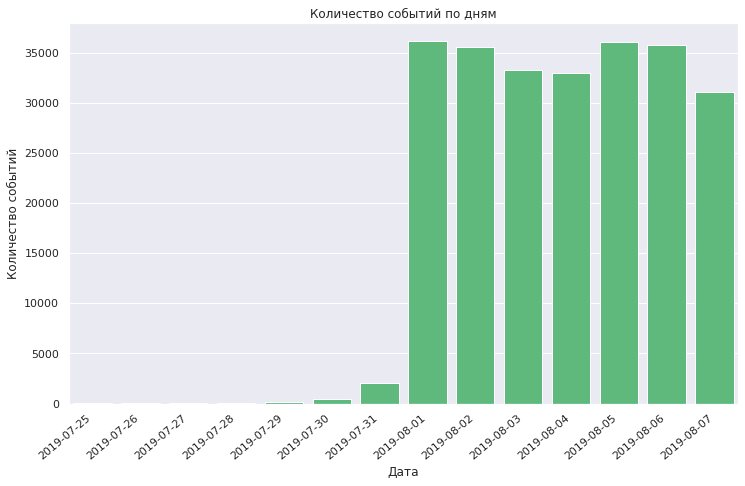

In [19]:
plt.figure(figsize=(12, 7))
fig = sns.barplot(
    x='index', 
    y='event_date', 
    data=logs_data['event_date'].value_counts().reset_index().sort_values(by='index'), 
    color='#50C878') 
fig.set_xticklabels(
    logs_data['event_date'].value_counts().reset_index().sort_values(by='index')['index'], 
    rotation=40, 
    ha="right")
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Количество событий по дням')

plt.show()

Данные, с которыми следует работать, начинаются с 01 августа 2019. Отбросим данные до этой даты. 

In [20]:
logs = logs_data[logs_data['event_date'] > dt.date(2019, 7, 31)]
logs['event_date'].min() #проверка

datetime.date(2019, 8, 1)

In [21]:
print('Отбросив старые данные, потеряли {} строк, - это {:.2%} событий и {:.2%} пользователей'.format(len(logs_data) - len(logs), 1 - len(logs) / len(logs_data), 1 - logs['user_id'].nunique()/logs_data['user_id'].nunique()))

Отбросив старые данные, потеряли 2826 строк, - это 1.16% событий и 0.23% пользователей


Проверим, что у нас есть записи и пользователи из всех трёх экспериментальных групп.

In [22]:
logs['group'].value_counts()

248    84563
246    79302
247    77022
Name: group, dtype: int64

Есть записи событий по всем трем группам

In [23]:
groups = logs.groupby('group')['user_id'].nunique().reset_index()
groups

,group,user_id
0,246,2484
1,247,2513
2,248,2537


Есть пользователи в каждой группе, и их количество несколько отличается

**Вывод**  
Отфильтровали лог по датам, т.к. продолжительность тетса не так значима, как количество пользователей в каждой группе. Чем больше пользователей, тем более достоверны результаты тестов.  
Убедились, что в данных есть записи и пользователи по всем трем группам.  
Можно переходить к анализу воронки событий. 

## Изучение и анализ воронки событий

### Распределение событий по частоте записей о них в логе

In [24]:
events_funnel = logs.groupby('event_name')['event_datetime'].count().sort_values(ascending=False).reset_index()
events_funnel

,event_name,event_datetime
0,MainScreenAppear,117328
1,OffersScreenAppear,46333
2,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


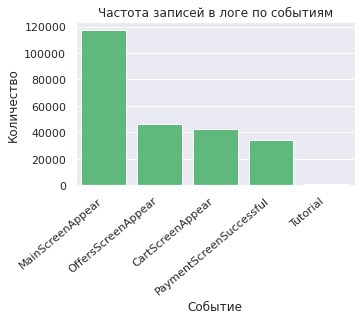

In [25]:
plt.figure(figsize=(5, 3))
fig = sns.barplot(x='event_name', y='event_datetime', data=events_funnel, color='#50C878') 
fig.set_xticklabels(events_funnel['event_name'], rotation=40, ha="right")
plt.xlabel('Событие')
plt.ylabel('Количество')
plt.title('Частота записей в логе по событиям')

plt.show()

В логах присутствуют записи о 5 уникальных событиях, основной экран MainScreenAppear - наиболее часто встречаемое событие. Крайне редко встречается обращение к Справке Tutorial.

### Количество уникальных пользователей, совершивших каждое из событий

Рассчитаем количество и долю уникальных пользователей, которые хоть раз совершали каждое из событий 

In [26]:
events_funnel = events_funnel.merge(
    logs.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).reset_index(),
    on='event_name'
    )
events_funnel.columns = ['event_name', 'n_events', 'n_users']

events_funnel['part_users'] = events_funnel['n_users']/logs['user_id'].nunique()

events_funnel

,event_name,n_events,n_users,part_users
0,MainScreenAppear,117328,7419,0.984736
1,OffersScreenAppear,46333,4593,0.609636
2,CartScreenAppear,42303,3734,0.495620
3,PaymentScreenSuccessful,33918,3539,0.469737
4,Tutorial,1005,840,0.111495


### Порядок событий, воронка

Исходя из полученного распределения количества уникальных пользователей по каждому событию, можно сделать вывод, что События происходят в следующем порядке:  
- Основной экран `MainScreenAppear` =>  
- Предложение `OffersScreenAppear` =>  
- Корзина `CartScreenAppear` =>  
- Оплата произведена `PaymentScreenSuccessful`

Справка `Tutorial` не входит в последовательную цепочку, остальные события в указанном порядке представляют собой воронку. 
Исключим Tutorial из воронки.

In [27]:
events_funnel = events_funnel.loc[events_funnel['event_name'] != 'Tutorial']

In [28]:
events_funnel

,event_name,n_events,n_users,part_users
0,MainScreenAppear,117328,7419,0.984736
1,OffersScreenAppear,46333,4593,0.609636
2,CartScreenAppear,42303,3734,0.495620
3,PaymentScreenSuccessful,33918,3539,0.469737


Рассчитаем, какая доля пользователей проходит на каждый следующий шаг воронки 

In [29]:
events_funnel = events_funnel.copy()
events_funnel.loc[:,'pct_change'] = events_funnel.loc[:,'n_users'].pct_change()
events_funnel

,event_name,n_events,n_users,part_users,pct_change
0,MainScreenAppear,117328,7419,0.984736,NaN
1,OffersScreenAppear,46333,4593,0.609636,-0.380914
2,CartScreenAppear,42303,3734,0.495620,-0.187024
3,PaymentScreenSuccessful,33918,3539,0.469737,-0.052223


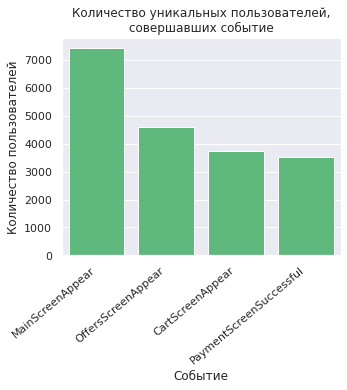

In [30]:
plt.figure(figsize=(5, 4))
fig = sns.barplot(x='event_name', y='n_users', data=events_funnel, color='#50C878') 
fig.set_xticklabels(events_funnel['event_name'], rotation=40, ha="right")
plt.xlabel('Событие')
plt.ylabel('Количество пользователей')
plt.title('Количество уникальных пользователей,\n\
совершавших событие')

plt.show()

По рассчитанному показателю оттока и графически видно, что больше всего пользователей теряется при переходе с первого на второй шаг. До оплаты доходят 46,97% пользователей.

## Анализ результатов A/A/B-эксперимента

Вспомним, сколько пользователей участвовало в каждой экспериментальной группе

In [31]:
groups

,group,user_id
0,246,2484
1,247,2513
2,248,2537


In [32]:
groups.rename(columns={'group': 'group', 'user_id': 'n_users'}, inplace=True)

In [33]:
groups = groups.set_index('group')
groups = groups.transpose()

In [34]:
groups['246+247'] = groups[246] + groups[247]

In [35]:
groups

group,246,247,248,246+247
n_users,2484,2513,2537,4997


Посмотрим, как распределялось количество пользователи по событиям в каждой группе

In [36]:
# составим сводную таблицу
funnel_by_groups = logs.pivot_table(index='event_name', columns='group', values='user_id', aggfunc='nunique').reset_index()
funnel_by_groups.columns.name = ''
# исключим Справку из воронки
funnel_by_groups = funnel_by_groups.loc[funnel_by_groups['event_name'] != 'Tutorial']
# отсортируем по убыванию количества событий
funnel_by_groups = funnel_by_groups.sort_values(by=246, ascending=False).reset_index(drop=True)
# добавим данные для объединенной контрольной группы
funnel_by_groups['246+247'] = funnel_by_groups[246] + funnel_by_groups[247]

In [37]:
funnel_by_groups

,event_name,246,247,248,246+247
0,MainScreenAppear,2450,2476,2493,4926
1,OffersScreenAppear,1542,1520,1531,3062
2,CartScreenAppear,1266,1238,1230,2504
3,PaymentScreenSuccessful,1200,1158,1181,2358


Зададим функцию для проверки гипотез о равентсве долей контрольных и тестовых групп по каждому событию. Уровень статистической значимости alpha установим равным 0.05

In [38]:
def ab_test_result(groups_list, alpha):
    alpha = alpha
    print('Сравнение долей группах ', groups_list[0], ' и ', groups_list[1])
    print('')
    
    for event in funnel_by_groups['event_name'].unique():
        # пропорция по событию в первой группе
        p1 = funnel_by_groups.query('event_name == @event')[groups_list[0]] / groups.loc['n_users', groups_list[0]]
        
        # пропорция по событию во второй группе
        p2 = funnel_by_groups.query('event_name == @event')[groups_list[1]] / groups.loc['n_users', groups_list[1]]
        
        
        # пропорция по событию в объединенных группах (первая+вторая)
        p_combined = (
            (funnel_by_groups.query('event_name == @event')[groups_list[0]] + funnel_by_groups.query('event_name == @event')[groups_list[1]]) /
            (groups.loc['n_users', groups_list[0]] + groups.loc['n_users', groups_list[1]])
        )
        
        # разница пропорций в группах
        difference = p1 - p2 
        
        # статистика (z_value) в ст.отклонениях стандартного нормального распределения
        z_value = (
            difference / 
            mth.sqrt(p_combined * (1 - p_combined) * (1/groups.loc['n_users', groups_list[0]] + 1/groups.loc['n_users', groups_list[0]]))
        )
        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1)        
       
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        
        
        print('Событие ', event)
        print('p-значение: ', p_value)
        
        if p_value < alpha:
            print('Отвергаем нулевую гипотезу (H0): между долями групп есть значимая разница')
        else:
            print('Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными') 
        
        print('=============================')
        print('')

### Проверка гипотезы о равенстве долей пользователей на каждом этапе воронки в *контрольных* группах

Посмотрим, работает ли разбиение на контрольные группы корректно. Проверим гипотезу о равенстве долей пользователей на каждом этапе воронки в контрольных группах.  
***Нулевая гипотеза (H0)*** - статистически значимых отличий в доле пользователей на этапе воронки в контрольных группах нет.  
***Альтернативная (H1)*** - между контрольными группами есть статистически значимые отличия в доле пользователей на этапе воронки. 

In [39]:
ab_test_result([246, 247], 0.05)

Сравнение долей группах  246  и  247

Событие  MainScreenAppear
p-значение:  [0.75773961]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  OffersScreenAppear
p-значение:  [0.24946462]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  CartScreenAppear
p-значение:  [0.23018135]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  PaymentScreenSuccessful
p-значение:  [0.11561795]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными



На всех этапах воронки нет оснований считать доли в группах разными.  Значит, пользователи, пришедшие в этот тест довольно однородно распределились, т.е. можно сранивать результаты тестовой группы с любой из контрольных групп, и исход должен быть одинаковый.

### Проверка гипотезы о равенстве долей пользователей на каждом этапе воронки в контрольной группе 246 и тестовой группе 248

Сравним результаты теста контрольной (к) группы 246 с тестовой (т) группой 248. Проверим гипотезу о равенстве долей пользователей на каждом этапе воронки в группах 246(к) и 248(т).  
***Нулевая гипотеза (H0)*** - статистически значимых отличий в доле пользователей на этапе воронки в группах 246(к) и 248(т) нет.  
***Альтернативная (H1)*** - между группами 246(к) и 248(т) есть статистически значимые отличия в доле пользователей на этапе воронки. 

In [40]:
ab_test_result([246, 248], 0.05)

Сравнение долей группах  246  и  248

Событие  MainScreenAppear
p-значение:  [0.297508]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  OffersScreenAppear
p-значение:  [0.21075419]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  CartScreenAppear
p-значение:  [0.0800048]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  PaymentScreenSuccessful
p-значение:  [0.21465895]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными



Результаты тестов по группам 246(к) и 248(т) говорят о том, что изменение шрифта не влияет на изменение показателей конверсии.

### Проверка гипотезы о равенстве долей пользователей на каждом этапе воронки в контрольной группе 247 и тестовой группе 248

Сравним результаты теста контрольной (к) группы 247 с тестовой (т) группой 248. Проверим гипотезу о равенстве долей пользователей на каждом этапе воронки в группах 247(к) и 248(т).  
***Нулевая гипотеза (H0)*** - статистически значимых отличий в доле пользователей на этапе воронки в группах 247(к) и 248(т) нет.  
***Альтернативная (H1)*** - между группами 247(к) и 248(т) есть статистически значимые отличия в доле пользователей на этапе воронки. 

In [41]:
ab_test_result([247, 248], 0.05)

Сравнение долей группах  247  и  248

Событие  MainScreenAppear
p-значение:  [0.45976987]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  OffersScreenAppear
p-значение:  [0.91997108]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  CartScreenAppear
p-значение:  [0.57951943]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  PaymentScreenSuccessful
p-значение:  [0.73794054]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными



Результаты тестов по группам 247(к) и 248(т) говорят о том, что изменение шрифта не влияет на изменение показателей конверсии.

### Проверка гипотезы о равенстве долей пользователей на каждом этапе воронки в контрольных группах 246+247 и тестовой группе 248

Сравним результаты теста объединенных контрольных (к) групп 246+247 с тестовой (т) группой 248. Проверим гипотезу о равенстве долей пользователей на каждом этапе воронки в группах 246+247(к) и 248(т).  
***Нулевая гипотеза (H0)*** - статистически значимых отличий в доле пользователей на этапе воронки в группах 246+247(к) и 248(т) нет.  
***Альтернативная (H1)*** - между группами 246+247(к) и 248(т) есть статистически значимые отличия в доле пользователей на этапе воронки. 

In [42]:
ab_test_result(['246+247', 248], 0.05)

Сравнение долей группах  246+247  и  248

Событие  MainScreenAppear
p-значение:  [0.2012268]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  OffersScreenAppear
p-значение:  [0.34068707]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  CartScreenAppear
p-значение:  [0.10369876]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  PaymentScreenSuccessful
p-значение:  [0.52331266]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными



Результаты тестов по объединенным контрольным (к) групп 246+247 и 248(т) также показали, что изменение шрифта не влияет на изменение показателей конверсии.

### Корректировка уровеня значимости при проверке статистических гипотез 

Использован уровень значимости 0.05, т.е каждый 20ый раз можно получить ложный результат. 

Так как тест является множественным, и с каждой новой проверкой гипотезы растёт вероятность ошибки первого рода, скорректируем уровень значимости alpha  по Методу Бонферрони (поправка Бонферрони) и проверим гипотезы еще раз.

In [43]:
ab_test_result([246, 247], 0.05/4)

Сравнение долей группах  246  и  247

Событие  MainScreenAppear
p-значение:  [0.75773961]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  OffersScreenAppear
p-значение:  [0.24946462]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  CartScreenAppear
p-значение:  [0.23018135]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  PaymentScreenSuccessful
p-значение:  [0.11561795]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными



In [44]:
ab_test_result([246, 248], 0.05/4)

Сравнение долей группах  246  и  248

Событие  MainScreenAppear
p-значение:  [0.297508]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  OffersScreenAppear
p-значение:  [0.21075419]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  CartScreenAppear
p-значение:  [0.0800048]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  PaymentScreenSuccessful
p-значение:  [0.21465895]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными



In [45]:
ab_test_result([247, 248], 0.05/4)

Сравнение долей группах  247  и  248

Событие  MainScreenAppear
p-значение:  [0.45976987]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  OffersScreenAppear
p-значение:  [0.91997108]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  CartScreenAppear
p-значение:  [0.57951943]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  PaymentScreenSuccessful
p-значение:  [0.73794054]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными



In [46]:
ab_test_result(['246+247', 248], 0.05/4)

Сравнение долей группах  246+247  и  248

Событие  MainScreenAppear
p-значение:  [0.2012268]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  OffersScreenAppear
p-значение:  [0.34068707]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  CartScreenAppear
p-значение:  [0.10369876]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными

Событие  PaymentScreenSuccessful
p-значение:  [0.52331266]
Не получилось отвергнуть нулевую гипотезу (H0), нет оснований считать доли в группах разными



 Корректировка уровня значимости не привела к изменению результатов теста. Замена шрифта не повлияет на показатели конверсии. 

## Вывод

Воронку продаж представляет собой цепочка событий:  
- Основной экран `MainScreenAppear` =>  
- Предложение `OffersScreenAppear` =>  
- Корзина `CartScreenAppear` =>  
- Оплата произведена `PaymentScreenSuccessful`  

Наибольшая часть пользователей теряется при переходе с первого шага на второй (38,09% пользователей).  

Результаты проведенных A/A/B-тестов показали, что изменение шрифта в приложении не влияет на конверсию ни на одном из этапов воронки. 